In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import cvs file (EasyVisa.csv) and create a dataframe
easy_visa_original_data_df = pd.read_csv("EasyVisa.csv")

# Check the dataframe 
easy_visa_original_data_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
# Create a working copy of the origional dataframe
easy_visa_df = easy_visa_original_data_df.copy()

# Drop any null values
easy_visa_df.dropna()

# Check the dataframe
easy_visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [4]:
# Check dataframe columns data type and total number of entries
easy_visa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


The Dataframe includes a total of 11 columns and 25480 rows. Apart from no_of_employees, yr_of_estab (int64) and prevailing_wage (float64), other columns have the data type of object

In [5]:
# stats for columns in the dataframe
easy_visa_df.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.043210,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.928848,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,-26.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [6]:
# Check for the number of negative entries in column "no_of_employees" 
number_of_entries_negative_employee_number = (easy_visa_df['no_of_employees'] < 0).sum()

print(f"Number of entries with negative valuess in the 'no_of_employees' column: {number_of_entries_negative_employee_number}")

Number of entries with negative valuess in the 'no_of_employees' column: 33


In [7]:
# Assume that negative entries were reported by mistake....taking the absloute of the numbers
easy_visa_df["no_of_employees"] = abs(easy_visa_df["no_of_employees"])

In [8]:
#checking again for negative values
number_of_entries_negative_employee_number = (easy_visa_df['no_of_employees'] < 0).sum()

print(f"Number of entries with negative valuess in the 'no_of_employees' column: {number_of_entries_negative_employee_number}")

Number of entries with negative valuess in the 'no_of_employees' column: 0


In [9]:
# Confirming the stats of the dataframe after fixing all negative values
easy_visa_df.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,25480,25480,25480,25480,25480,25480.000000,25480.000000,25480,25480.000000,25480,25480,25480
unique,25480,6,4,2,2,NaN,NaN,5,NaN,4,2,2
top,EZYV01,Asia,Bachelor's,Y,N,NaN,NaN,Northeast,NaN,Year,Y,Certified
freq,1,16861,10234,14802,22525,NaN,NaN,7195,NaN,22962,22773,17018
mean,NaN,NaN,NaN,NaN,NaN,5667.089207,1979.409929,NaN,74455.814592,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,22877.917453,42.366929,NaN,52815.942327,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,11.000000,1800.000000,NaN,2.136700,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1022.000000,1976.000000,NaN,34015.480000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,2109.000000,1997.000000,NaN,70308.210000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3504.000000,2005.000000,NaN,107735.512500,NaN,NaN,NaN


In [10]:
# The focus in this study is use all rows where unit of wages are reported as "year" 
filtered_easy_visa_df = easy_visa_df[easy_visa_df['unit_of_wage']=='Year']
filtered_easy_visa_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.86,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.03,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.39,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified


In [11]:
# checking number of entries based on the selection of "year" as unit of wages
filtered_easy_visa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22962 entries, 1 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                22962 non-null  object 
 1   continent              22962 non-null  object 
 2   education_of_employee  22962 non-null  object 
 3   has_job_experience     22962 non-null  object 
 4   requires_job_training  22962 non-null  object 
 5   no_of_employees        22962 non-null  int64  
 6   yr_of_estab            22962 non-null  int64  
 7   region_of_employment   22962 non-null  object 
 8   prevailing_wage        22962 non-null  float64
 9   unit_of_wage           22962 non-null  object 
 10  full_time_position     22962 non-null  object 
 11  case_status            22962 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


number of entries = 22962 entries

In [12]:
# Check and remove possible outliers from the column "no_of_employees"
quartiles = filtered_easy_visa_df["no_of_employees"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)
filtered_easy_visa_df = filtered_easy_visa_df[(filtered_easy_visa_df["no_of_employees"] > lower_bound) & (filtered_easy_visa_df["no_of_employees"] < upper_bound)]

-2757.25
7360.75


In [13]:
# Check and remove possible outliers from the column "prevailing_wage"
quartiles = filtered_easy_visa_df["prevailing_wage"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)
filtered_easy_visa_df = filtered_easy_visa_df[(filtered_easy_visa_df["prevailing_wage"] > lower_bound) & (filtered_easy_visa_df["prevailing_wage"] < upper_bound)]

-57890.88999999997
213009.86999999997


In [14]:
# Check and remove possible outliers from the column "yr_of_estab"
quartiles = filtered_easy_visa_df["yr_of_estab"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)
filtered_easy_visa_df = filtered_easy_visa_df[(filtered_easy_visa_df["yr_of_estab"] > lower_bound) & (filtered_easy_visa_df["yr_of_estab"] < upper_bound)]

1935.0
2047.0


In [15]:
# DataFrame stats after removing outliers
filtered_easy_visa_df.describe(include='all')

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
count,18430,18430,18430,18430,18430,18430.000000,18430.000000,18430,18430.000000,18430,18430,18430
unique,18430,6,4,2,2,NaN,NaN,5,NaN,1,2,2
top,EZYV02,Asia,Bachelor's,Y,N,NaN,NaN,South,NaN,Year,Y,Certified
freq,1,12366,7406,11032,16169,NaN,NaN,5006,NaN,18430,16376,12840
mean,NaN,NaN,NaN,NaN,NaN,2223.555833,1994.329951,NaN,77813.302024,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1504.850983,16.279233,NaN,44402.797942,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,11.000000,1936.000000,NaN,104.170000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,971.000000,1987.000000,NaN,43050.517500,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1989.000000,1999.000000,NaN,74635.865000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,3266.000000,2006.000000,NaN,109132.965000,NaN,NaN,NaN


In [16]:
# final check for number of entries
filtered_easy_visa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18430 entries, 1 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                18430 non-null  object 
 1   continent              18430 non-null  object 
 2   education_of_employee  18430 non-null  object 
 3   has_job_experience     18430 non-null  object 
 4   requires_job_training  18430 non-null  object 
 5   no_of_employees        18430 non-null  int64  
 6   yr_of_estab            18430 non-null  int64  
 7   region_of_employment   18430 non-null  object 
 8   prevailing_wage        18430 non-null  float64
 9   unit_of_wage           18430 non-null  object 
 10  full_time_position     18430 non-null  object 
 11  case_status            18430 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


Total of 18430 entries

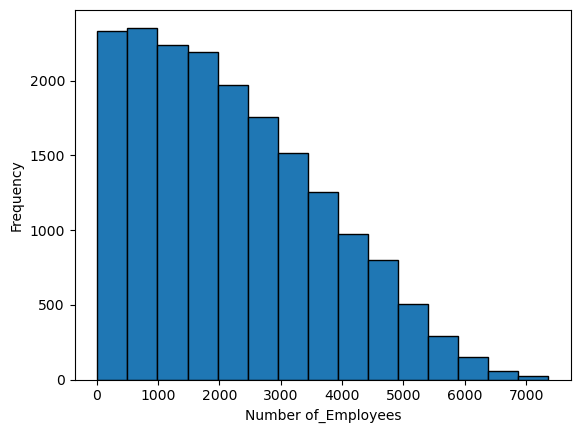

In [17]:
# Checking distribution of numerical columns: column "no_of_employees"
plt.hist(filtered_easy_visa_df['no_of_employees'], bins=15, edgecolor='black')
plt.xlabel('Number of_Employees')
plt.ylabel('Frequency')


plt.show()

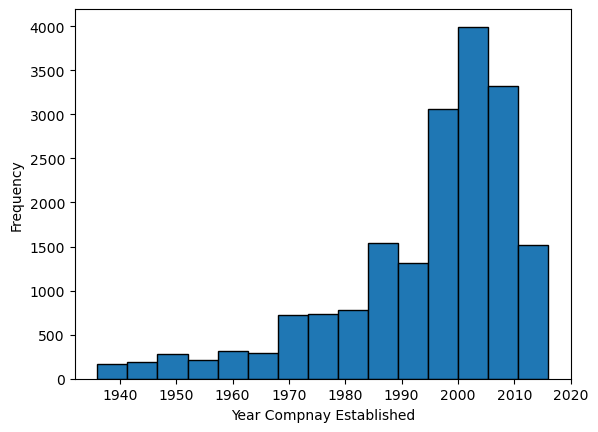

In [18]:
# Checking distribution of numerical columns: column "yr_of_estab"
plt.hist(filtered_easy_visa_df['yr_of_estab'], bins=15, edgecolor='black')
plt.xlabel('Year Compnay Established')
plt.ylabel('Frequency')


plt.show()

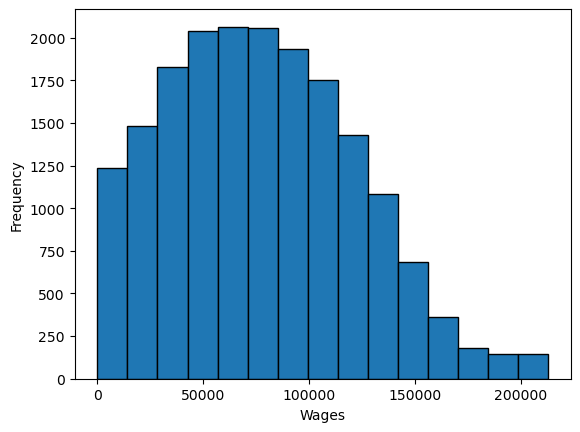

In [19]:
# Checking distribution of numerical columns: column "prevailing_wage"
plt.hist(filtered_easy_visa_df['prevailing_wage'], bins=15, edgecolor='black')
plt.xlabel('Wages')
plt.ylabel('Frequency')


plt.show()

In [20]:
# Export dataframe filtered_easy_visa_df as a csv file to be used in the Machine Learning Modelling
filtered_easy_visa_df.to_csv("easy_visa_cleaned_NoOutliers.csv", index=False)